In [217]:
import pandas as pd 
import numpy as np
df1 = pd.read_csv('../dataframes/5lab frames/marketing_campaign.csv', na_values='?')
df2 = pd.read_csv('../dataframes/5lab frames/subscribers.csv', na_values='?')
df3 = pd.read_csv('../dataframes/5lab frames/users.csv', na_values='?')
df2

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True
...,...,...,...,...,...
10032,a11032,Email,1/17/18,1/24/18,False
10033,a11033,Email,1/17/18,NaN,True
10034,a11034,Email,1/17/18,NaN,True
10035,a11035,Email,1/17/18,NaN,True


In [218]:
print(df1.shape[0])  
print(df2.shape[0])  
print(df3.shape[0])  

10037
10037
10037


In [219]:
df = df1.merge(df2, on='user_id')
df = df.merge(df3, on='user_id')
df

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
0,a1000,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,0-18 years,English
1,a1001,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,19-24 years,English
2,a1002,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,24-30 years,English
3,a1003,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,30-36 years,English
4,a1004,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,36-45 years,English
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True,Email,1/17/18,1/24/18,False,45-55 years,German
10033,a11033,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,55+ years,German
10034,a11034,1/5/18,Instagram,control,German,False,Email,1/17/18,NaN,True,55+ years,German
10035,a11035,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,0-18 years,German


In [220]:
df.dtypes

user_id                object
date_served            object
marketing_channel      object
variant                object
language_displayed     object
converted              object
subscribing_channel    object
date_subscribed        object
date_canceled          object
is_retained            object
age_group              object
language_preferred     object
dtype: object

In [221]:
df_grouped = df.groupby('marketing_channel')['is_retained'].sum()
df_grouped

marketing_channel
Email        149
Facebook     260
House Ads    502
Instagram    261
Push         107
Name: is_retained, dtype: object

In [222]:
df_count = df.groupby('age_group')['user_id'].count()
df_count

age_group
0-18 years     1539
19-24 years    1682
24-30 years    1568
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: user_id, dtype: int64

In [223]:
datetime = df['date_subscribed']
datetime = pd.to_datetime(datetime,format="%m/%d/%y")
datetime.min()



Timestamp('2018-01-01 00:00:00')

In [224]:
retained = df[df['is_retained'] == True].groupby(['age_group', 'language_displayed'])['user_id'].count()
retained

age_group    language_displayed
0-18 years   Arabic                  3
             English               213
             German                 10
             Spanish                 3
19-24 years  Arabic                  1
             English               311
             German                  9
             Spanish                 5
24-30 years  English               255
             German                 15
             Spanish                 3
30-36 years  English               117
             German                  1
             Spanish                 4
36-45 years  Arabic                  1
             English               111
             German                  2
             Spanish                 1
45-55 years  Arabic                  2
             English               110
             German                  2
             Spanish                 5
55+ years    Arabic                  2
             English                88
             German             

In [225]:
df['converted'] = np.where(df['converted'] == True, 1, 0 )

df

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
0,a1000,1/1/18,House Ads,personalization,English,1,House Ads,1/1/18,NaN,True,0-18 years,English
1,a1001,1/1/18,House Ads,personalization,English,1,House Ads,1/1/18,NaN,True,19-24 years,English
2,a1002,1/1/18,House Ads,personalization,English,1,House Ads,1/1/18,NaN,True,24-30 years,English
3,a1003,1/1/18,House Ads,personalization,English,1,House Ads,1/1/18,NaN,True,30-36 years,English
4,a1004,1/1/18,House Ads,personalization,English,1,House Ads,1/1/18,NaN,True,36-45 years,English
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,1,Email,1/17/18,1/24/18,False,45-55 years,German
10033,a11033,1/17/18,Email,control,German,1,Email,1/17/18,NaN,True,55+ years,German
10034,a11034,1/5/18,Instagram,control,German,0,Email,1/17/18,NaN,True,55+ years,German
10035,a11035,1/17/18,Email,control,German,1,Email,1/17/18,NaN,True,0-18 years,German


In [226]:
from scipy.stats import chi2_contingency

df_check = pd.crosstab(df['variant'], df['converted'])
chi2, p_value, degreesf, ex_v = chi2_contingency(df_check)
print(p_value)
df_check



2.4070089722655752e-29


converted,0,1
variant,,
control,4720,371
personalization,4241,705


In [227]:
def value(x):
    return  - 45*x[0] - 80*x[1]

In [228]:

neq_cons = {'type': 'ineq',
             'fun': lambda x: np.array ([450 - 10 * x [0] - 15 * x [1],
                                         400 - 5 * x [0] - 20 * x [1]])}

In [229]:
from scipy.optimize import Bounds
bnds = Bounds([0, 0], [np.inf, np.inf])

In [230]:
from scipy.optimize import minimize
x0 = np.array([10, 10])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print(res.x)

[24. 14.]


In [231]:
print(f'Количество произведенных стульев и столов составляет {res.x} соответственно')
print('Максимизированная прибыль составит:', -1*value([24, 14]),'долларов./месяц')

Количество произведенных стульев и столов составляет [24. 14.] соответственно
Максимизированная прибыль составит: 2200 долларов./месяц


In [232]:
df = pd.DataFrame({'day': [1,3,7,14,21,30],
                   'retained': [0.4,0.6,0.8,1.10,1.30,1.40]})
df.head(6)

,day,retained
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


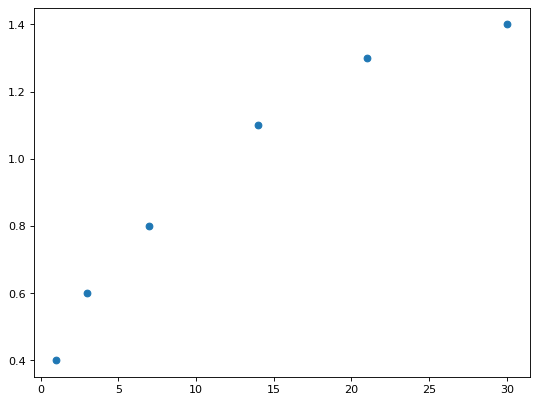

In [233]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['retained'])

In [234]:
def log_func( x, a, b, c ):
    return -a * np.log2( b + x ) + c

In [235]:
def exp_func( x, a, b, c ):
    return a * np.exp( -b * x ) + c

In [236]:
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(log_func, df['day'], df['retained'])

In [237]:
exp_popt, exp_pcov = curve_fit(exp_func, df['day'], df['retained'])

In [238]:
projection_endpoint = 90

In [239]:
log_y_projected = log_func( np.arange( projection_endpoint ), *log_popt )
exp_y_projected = exp_func( np.arange( projection_endpoint ), *exp_popt )

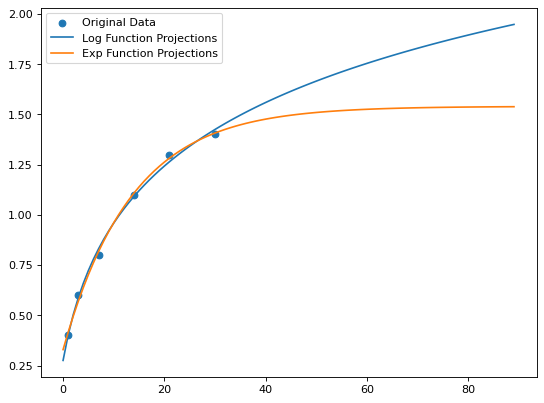

In [240]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['retained'], label="Original Data" )
plt.plot( log_y_projected, label="Log Function Projections" )
plt.plot( exp_y_projected, label="Exp Function Projections" )
plt.legend()
plt.show()

In [241]:
print('Прогноз кол-ва пользователей через 90 дней по log модели', round(log_y_projected[89],0))
print('Прогноз кол-ва пользователей через 90 дней по exp модели', round(exp_y_projected[89],0))

Прогноз кол-ва пользователей через 90 дней по log модели 2.0
Прогноз кол-ва пользователей через 90 дней по exp модели 2.0


In [242]:
y_log_pred = [log_y_projected[ i ] for i in list(df['day'])]
y_log_pred

[0.40124030788520265,
 0.5868265922309144,
 0.8306563452037643,
 1.0918230784760043,
 1.2643750867065862,
 1.4250785895188456]

In [243]:
y_exp_pred = [exp_y_projected[ i ] for i in list(df['day'])]
y_exp_pred

[0.4152644555519349,
 0.5694065241828665,
 0.81720684756981,
 1.108495305483976,
 1.2823787722727733,
 1.4072480949334225]

У обоих моделей относительно одинаковая точность